## EURO 2016 Dashboard

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('goals.csv', encoding='latin-1')

In [4]:
df.head()

,full_name,age,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,...,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
0,Aaron Ramsey,30,UEFA Euro Championship,2016,Midfielder,Wales,448,268,180,Wales,...,0.20,0.00,0.50,448,0.60,149,90,224,112,0.40
1,Adam Szalai,33,UEFA Euro Championship,2016,Forward,Hungary,235,161,74,Hungary,...,0.38,0.00,1.22,235,2.30,39,59,235,0,0.38
2,Admir Mehmedi,30,UEFA Euro Championship,2016,Forward,Switzerland,308,156,152,Switzerland,...,0.29,0.00,0.59,308,0.58,154,77,0,0,0.00
3,Alessandro Schoepf,27,UEFA Euro Championship,2016,Midfielder,Austria,81,12,69,Austria,...,1.11,0.00,1.30,81,1.11,81,27,81,0,1.11
4,Alvaro Morata,28,UEFA Euro Championship,2016,Forward,Spain,289,152,137,Spain,...,0.93,1.18,0.66,96,0.62,145,72,0,0,0.00


In [6]:
df.columns

Index(['full_name', 'age', 'league', 'season', 'position', 'Current Club',
       'minutes_played_overall', 'minutes_played_home', 'minutes_played_away',
       'nationality', 'appearances_overall', 'appearances_home',
       'appearances_away', 'goals_overall', 'goals_home', 'goals_away',
       'assists_overall', 'assists_home', 'assists_away', 'penalty_goals',
       'penalty_misses', 'clean_sheets_overall', 'clean_sheets_home',
       'clean_sheets_away', 'conceded_overall', 'conceded_home',
       'conceded_away', 'yellow_cards_overall', 'red_cards_overall',
       'goals_involved_per_90_overall', 'assists_per_90_overall',
       'goals_per_90_overall', 'goals_per_90_home', 'goals_per_90_away',
       'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
       'min_per_assist_overall', 'cards_per_90_overall'],
      dtype='object')

In [7]:
df_player = df[['full_name','nationality','goals_overall','assists_overall']]

In [8]:
df_player.head()

,full_name,nationality,goals_overall,assists_overall
0,Aaron Ramsey,Wales,1,4
1,Adam Szalai,Hungary,1,0
2,Admir Mehmedi,Switzerland,1,0
3,Alessandro Schoepf,Austria,1,0
4,Alvaro Morata,Spain,3,0


In [9]:
df_player[df_player['goals_overall']>2]

,full_name,nationality,goals_overall,assists_overall
4,Alvaro Morata,Spain,3,0
5,Antoine Griezmann,France,6,2
16,Cristiano Ronaldo,Portugal,3,2
19,Dimitri Payet,France,3,2
26,Gareth Bale,Wales,3,0
42,Luis Carlos Almeida da Cunha,Portugal,3,1
53,Olivier Giroud,France,3,2


In [11]:
df_player[df_player['assists_overall']>1]

,full_name,nationality,goals_overall,assists_overall
0,Aaron Ramsey,Wales,1,4
5,Antoine Griezmann,France,6,2
16,Cristiano Ronaldo,Portugal,3,2
19,Dimitri Payet,France,3,2
20,Eden Hazard,Belgium,1,4
53,Olivier Giroud,France,3,2


In [12]:
df_country = df.groupby('nationality',as_index=False).agg({"goals_overall":"sum","assists_overall":"sum"})

In [13]:
df_country.head()

,nationality,goals_overall,assists_overall
0,Albania,1,0
1,Austria,1,0
2,Belgium,9,5
3,Croatia,5,2
4,Czech Republic,2,0


In [15]:
df_country[df_country['assists_overall']>3]

,nationality,goals_overall,assists_overall
2,Belgium,9,5
6,France,13,6
13,Portugal,9,4
21,Wales,9,4


In [16]:
df_country[df_country['goals_overall']>5]

,nationality,goals_overall,assists_overall
2,Belgium,9,5
6,France,13,6
7,Germany,7,2
9,Iceland,8,2
10,Italy,6,2
13,Portugal,9,4
21,Wales,9,4


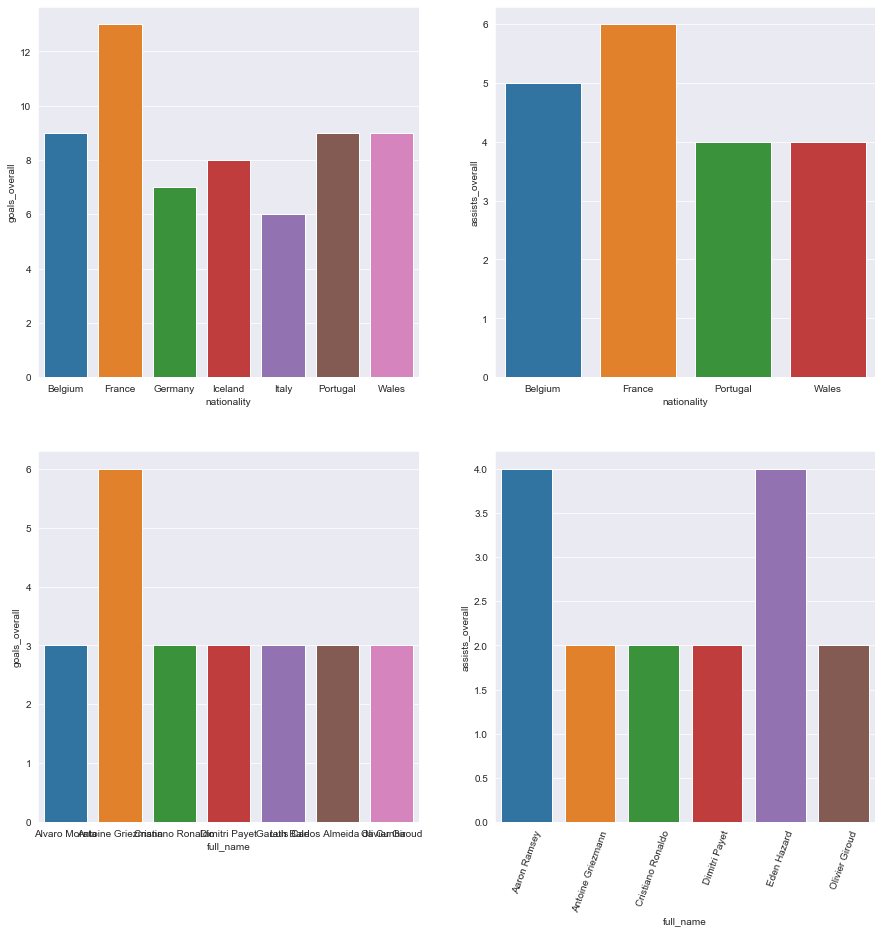

In [27]:
f , axes = plt.subplots(2,2, figsize = (15,15))
sns.set_style("darkgrid")

fig1 = sns.barplot(x="nationality", y ="goals_overall", 
                   data = df_country[df_country['goals_overall']>5], ax = axes[0,0] )

fig2 = sns.barplot(x="nationality", y ="assists_overall", 
                   data = df_country[df_country['assists_overall']>3], ax = axes[0,1])

fig3 = sns.barplot(x="full_name", y ="goals_overall", 
                   data = df_player[df_player['goals_overall']>2], ax = axes[1,0])

fig4 = sns.barplot(x="full_name", y ="assists_overall", 
                   data = df_player[df_player['assists_overall']>1], ax = axes[1,1])

plt.xticks(rotation=70)

plt.show()